#### Bibliotecas

In [14]:
import pandas as pd

import warnings

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Exibir todas as linhas e as colunas
pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)

# Evitar a exibição de avisos
warnings.filterwarnings('ignore')

#### Importando e analisando os dados

In [ ]:
url_sp = 'https://github.com/JoaoSilvaFelix/tese_joao/raw/main/dados/df_conjunto_sp.xlsx'
df = pd.read_excel(url_sp)

In [12]:
# Primeiras obsevações
df.head()

,semana,cesta_dieese,carne,leite,feijao,arroz,farinha,batata,tomate,pao,cafe,banana,acucar,oleo,manteiga,cesta_online
0,2024-02-17,808.38,38.199704,5.712709,8.571115,8.238805,5.303902,9.610977,11.930889,16.964554,11.909262,8.593504,6.218750,6.845313,15.175268,816.644084
1,2024-02-24,808.38,38.784197,5.618541,8.843281,8.460607,5.309725,9.974614,9.884167,16.721563,11.199107,8.919570,5.788785,6.728775,14.451126,801.508372
2,2024-03-02,813.26,38.689152,5.689897,8.927622,8.697778,5.304472,9.322649,9.830541,16.925714,11.548761,9.120326,5.845902,6.802659,14.560627,803.128172
3,2024-03-09,813.26,38.102904,5.756449,8.978164,8.579781,5.390478,9.666078,10.357972,15.967714,11.783650,9.549222,5.881611,6.632601,14.488423,806.255190
4,2024-03-16,813.26,37.564311,5.703271,8.594557,8.515244,5.370970,8.475679,10.980625,16.259345,11.342614,9.704817,6.423000,6.661159,15.603002,807.406547


In [ ]:
# Algumas estatísticas descritivas
df.describe().T

,count,mean,min,25%,50%,75%,max,std
semana,68,2024-10-08 12:00:00,2024-02-17 00:00:00,2024-06-13 06:00:00,2024-10-08 12:00:00,2025-02-02 18:00:00,2025-05-31 00:00:00,NaN
cesta_dieese,68.0,836.576471,786.35,809.77,828.39,860.53,909.25,35.582135
carne,68.0,43.10312,37.033196,38.78079,41.283501,47.907958,50.747125,4.741141
leite,68.0,6.350959,5.618541,6.059516,6.269022,6.511366,7.370695,0.44399
feijao,68.0,8.139542,7.064775,7.705279,8.178665,8.409659,9.110325,0.507999
arroz,68.0,8.515765,7.874861,8.09652,8.525243,8.815975,9.351111,0.438427
farinha,68.0,5.634308,5.063134,5.299694,5.474991,5.758413,6.978377,0.468466
batata,68.0,8.227801,4.734792,6.644865,8.182204,9.075127,13.479444,2.190608
tomate,68.0,10.454937,5.402,8.685852,10.051528,11.988297,15.583,2.692242
pao,68.0,17.722342,15.847528,16.368167,16.772,18.816667,21.086364,1.706014


Comparação, para a cidade de São Paulo, entre os dados coletados online e os dados divulgados pelo DIEESE

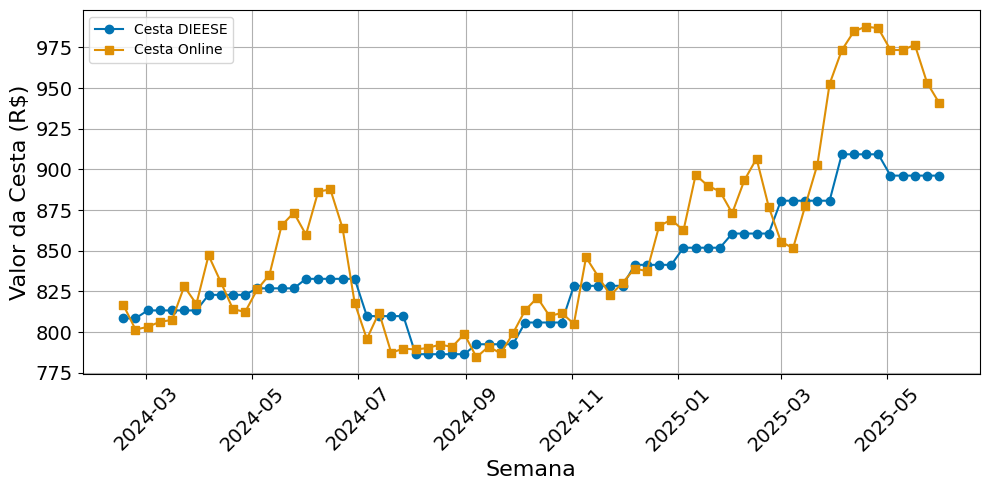

In [16]:
# Paleta daltônica
colors = sns.color_palette("colorblind")

# Criar figura
plt.figure(figsize=(10, 5))
plt.plot(df['semana'], df['cesta_dieese'], label='Cesta DIEESE', marker='o', color=colors[0])
plt.plot(df['semana'], df['cesta_online'], label='Cesta Online', marker='s', color=colors[1])


# Ajustes visuais
plt.xlabel('Semana', fontsize=16)   # legenda eixo x
plt.ylabel('Valor da Cesta (R$)', fontsize=16)  # legenda eixo y
plt.title('')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, fontsize=14)  # aumenta os números do eixo x
plt.yticks(fontsize=14)               # aumenta os números do eixo y
plt.tight_layout()

# Exibir o gráfico
plt.show()